In [1]:
#!pip install seaborn
#!pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
d = pd.read_csv('./data/iris.csv')
d

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
d['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
d.describe()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Data visualisation

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

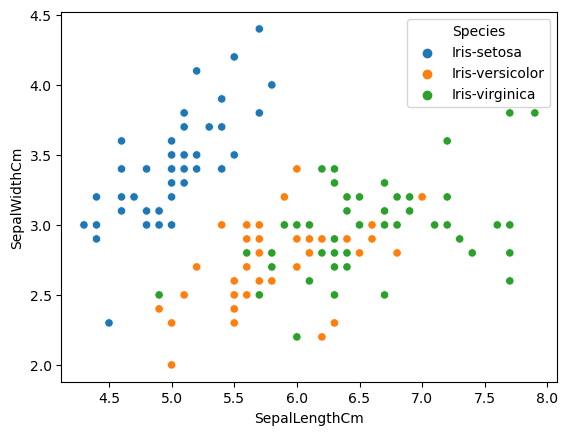

In [6]:
sns.scatterplot( data =d, x = 'SepalLengthCm',y ='SepalWidthCm', hue = 'Species')

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

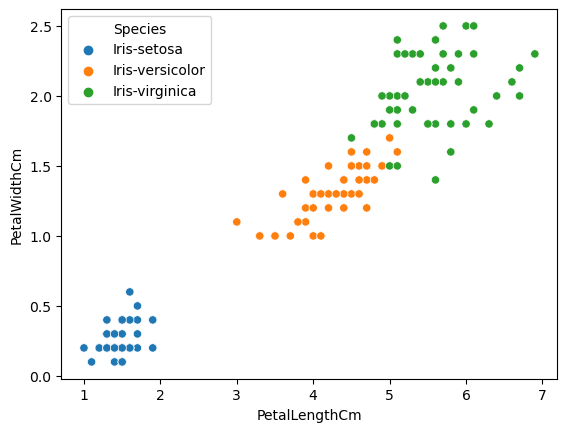

In [7]:
sns.scatterplot( data =d, x = 'PetalLengthCm',y ='PetalWidthCm', hue = 'Species')

<Axes: >

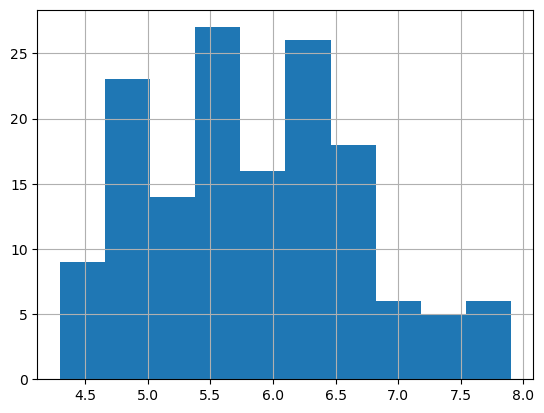

In [8]:
d.SepalLengthCm.hist()

<Axes: >

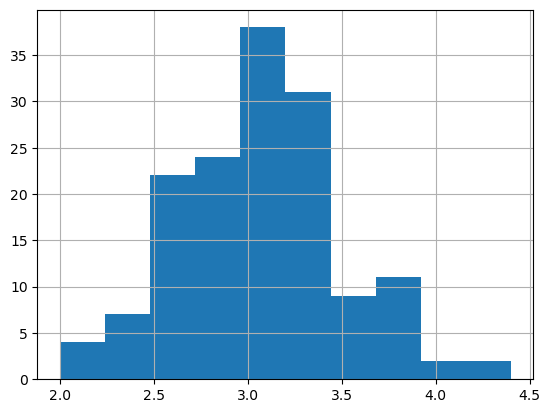

In [9]:
d.SepalWidthCm.hist()

<Axes: >

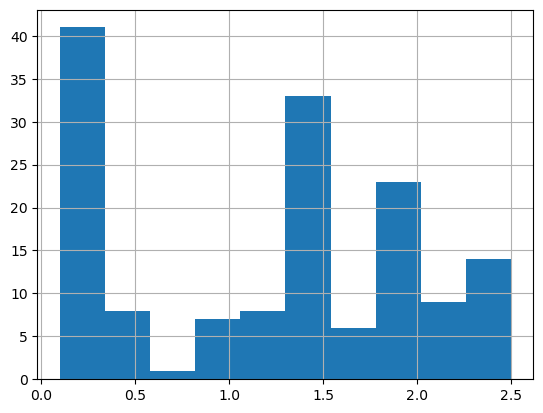

In [10]:
d.PetalWidthCm.hist()

<Axes: >

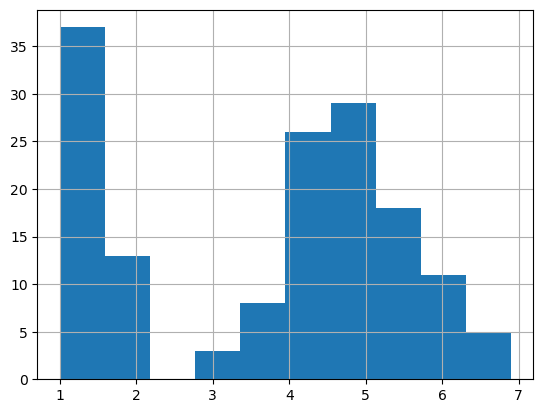

In [11]:
d.PetalLengthCm.hist()

In [12]:
d.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [13]:
numeric_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
correlation_matrix = d[numeric_columns].corr().round(2)
correlation_matrix


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.00,-0.11,0.87,0.82
SepalWidthCm,-0.11,1.00,-0.42,-0.36
PetalLengthCm,0.87,-0.42,1.00,0.96
PetalWidthCm,0.82,-0.36,0.96,1.00


<Axes: >

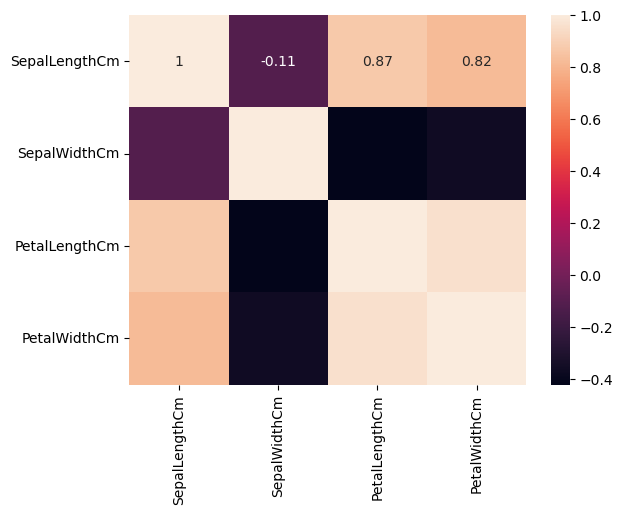

In [14]:
sns.heatmap(correlation_matrix , annot=True)

In [15]:
#if we have too many values we can eliminate by doing this
corr_matrix = d[numeric_columns].corr().round(2) > 0.02
corr_matrix

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,True,False,True,True
SepalWidthCm,False,True,False,False
PetalLengthCm,True,False,True,True
PetalWidthCm,True,False,True,True


<Axes: >

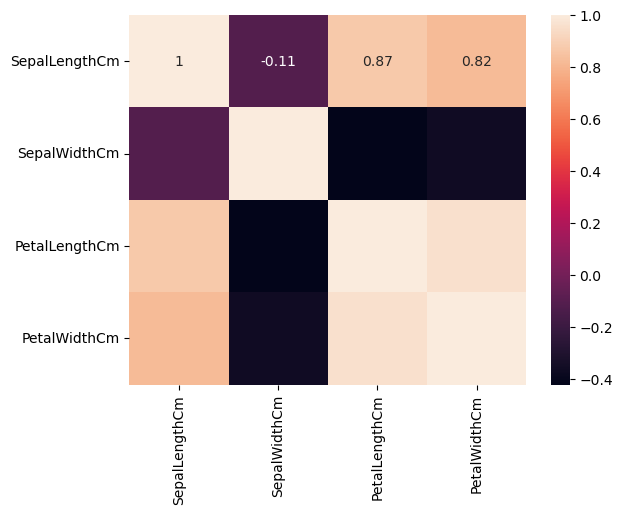

In [16]:
sns.heatmap(correlation_matrix , annot=True)

In [17]:
d[numeric_columns].corr()['SepalLengthCm'][ d[numeric_columns].corr()['SepalLengthCm'] >0.7]

SepalLengthCm    1.000000
PetalLengthCm    0.871754
PetalWidthCm     0.817954
Name: SepalLengthCm, dtype: float64

In [18]:
d[numeric_columns].corr().round(2)[d[numeric_columns].corr().round(2)<0.02]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,NaN,-0.11,NaN,NaN
SepalWidthCm,-0.11,NaN,-0.42,-0.36
PetalLengthCm,NaN,-0.42,NaN,NaN
PetalWidthCm,NaN,-0.36,NaN,NaN


In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le= LabelEncoder()

In [21]:
d.Species=le.fit_transform(d.Species)
d.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [22]:
x = d.iloc[:, :4] #dependant var
y = d.Species #target
x

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm
0,1,5.1,3.5,1.4
1,2,4.9,3.0,1.4
2,3,4.7,3.2,1.3
3,4,4.6,3.1,1.5
4,5,5.0,3.6,1.4
...,...,...,...,...
145,146,6.7,3.0,5.2
146,147,6.3,2.5,5.0
147,148,6.5,3.0,5.2
148,149,6.2,3.4,5.4


In [23]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size = 0.3, shuffle = True, random_state =45)

In [26]:
x_train.shape, x_test.shape

((105, 4), (45, 4))

In [27]:
y_train.shape, y_test.shape

((105,), (45,))

In [28]:
from sklearn.naive_bayes import GaussianNB
nb =  GaussianNB()

In [29]:
nb.fit(x_train, y_train)
nb.score(x_train, y_train)

0.9904761904761905

In [30]:
nb.predict(x_test)

array([0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 1, 1, 1,
       2, 1, 0, 2, 1, 1, 0, 1, 1, 1, 2, 1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1,
       1])

In [31]:
#y_test
np.array([y_test])

array([[0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 1, 1, 1,
        2, 1, 0, 2, 1, 1, 0, 1, 1, 1, 2, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1,
        1]])

In [32]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix,classification_report,ConfusionMatrixDisplay, recall_score

In [33]:
round(accuracy_score(y_test,nb.predict(x_test)),2)

0.98

In [34]:
confusion_matrix(y_test,nb.predict(x_test)).round(2)

array([[17,  0,  0],
       [ 0, 13,  0],
       [ 0,  1, 14]], dtype=int64)

In [35]:
d.Species.unique()

array([0, 1, 2])

In [36]:
le = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [37]:
le

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

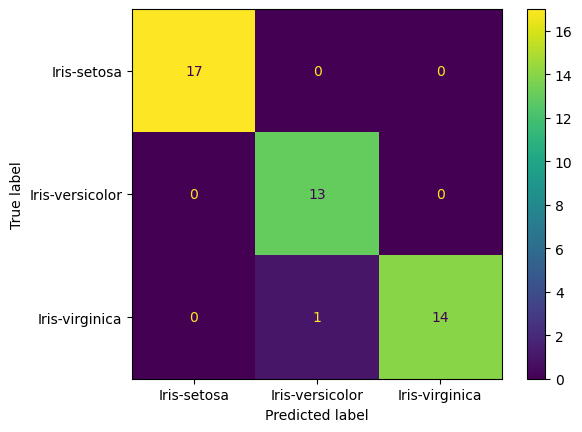

In [38]:
ConfusionMatrixDisplay(confusion_matrix(y_test,nb.predict(x_test)).round(2), display_labels =le).plot()

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [40]:
knn.fit(x_train, y_train)
knn.score(x_train, y_train)


0.9904761904761905

In [41]:
knn.predict(x_test)

array([0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 1, 1, 1,
       2, 1, 0, 2, 1, 1, 0, 1, 1, 1, 2, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1,
       1])

In [42]:
accuracy_score(y_test,knn.predict(x_test))

1.0

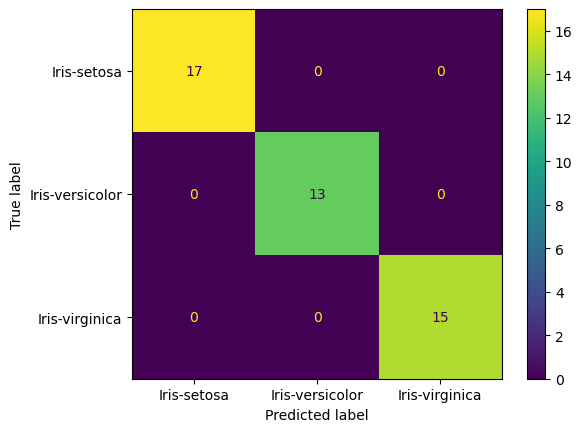

In [43]:
ConfusionMatrixDisplay(confusion_matrix(y_test,knn.predict(x_test)).round(2), display_labels =le).plot()

In [ ]:
rmse = np.sqrt(mse)
rmse

In [45]:
df = pd.read_csv('./data/storedata.csv')
df.head()

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance
0,Swinton (Greater Manchester),UK,1437,Roger,9,18526,121,Yes,10,Retail Park,1288374,1138224,1006986,1002340,3,238,16,16,Good
1,Stamford,UK,1544,Ella,8,18569,121,Yes,11,Shopping Centre,1086225,1015321,1012182,1008436,4,384,15,19,Good
2,Skipton,UK,2039,Valentina,-2,12288,105,No,12,Retail Park,1595638,1281661,1104490,1011395,11,219,13,18,Bad
3,Stratton,UK,2055,Antonia,7,17092,117,No,14,High Street,1179395,1022959,1009496,1002169,5,261,15,12,Bad
4,Shepperton,UK,2141,Gabriel,7,11307,103,No,18,Retail Park,1398558,1085170,1003137,1002513,7,200,19,13,Bad


In [46]:
df.size, df.shape,df.columns

(2584,
 (136, 19),
 Index(['Town', 'Country', 'Store ID', 'Manager name', 'Staff', 'Floor Space',
        'Window', 'Car park', 'Demographic score', 'Location',
        '40min population', '30 min population', '20 min population',
        '10 min population', 'Store age', 'Clearance space',
        'Competition number', 'Competition score', 'Performance'],
       dtype='object'))

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Town                136 non-null    object
 1   Country             136 non-null    object
 2   Store ID            136 non-null    int64 
 3   Manager name        136 non-null    object
 4   Staff               136 non-null    int64 
 5   Floor Space         136 non-null    int64 
 6   Window              136 non-null    int64 
 7   Car park            136 non-null    object
 8   Demographic score   136 non-null    int64 
 9   Location            136 non-null    object
 10  40min population    136 non-null    int64 
 11  30 min population   136 non-null    int64 
 12  20 min population   136 non-null    int64 
 13  10 min population   136 non-null    int64 
 14  Store age           136 non-null    int64 
 15  Clearance space     136 non-null    int64 
 16  Competition number  136 no

In [48]:
df.describe().round(3)

,Store ID,Staff,Floor Space,Window,Demographic score,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score
count,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000
mean,52172.581,13.353,15024.096,112.044,14.463,1487374.478,1249869.941,1134532.765,1066117.735,6.529,262.426,14.463,14.809
std,28725.990,56.592,2761.802,6.884,2.875,280498.938,216087.517,149027.970,88845.854,2.815,51.724,2.895,2.955
min,1437.000,-2.000,10072.000,100.000,10.000,1030405.000,1000653.000,1000214.000,1000002.000,2.000,200.000,10.000,10.000
25%,24707.250,6.000,12793.000,106.750,12.000,1254949.250,1057284.000,1012572.750,1005593.000,4.000,220.750,12.000,13.000
50%,56011.500,7.000,14596.500,111.000,14.500,1516337.500,1214459.000,1077542.000,1033228.500,6.000,249.000,15.000,15.000
75%,76870.500,8.000,17543.750,118.000,17.000,1696352.500,1396966.750,1203076.750,1090349.000,9.000,292.250,17.000,18.000
max,99854.000,600.000,19869.000,124.000,19.000,1997044.000,1929089.000,1723395.000,1426533.000,11.000,408.000,19.000,19.000


In [49]:
df.isna().sum()

Town                  0
Country               0
Store ID              0
Manager name          0
Staff                 0
Floor Space           0
Window                0
Car park              0
Demographic score     0
Location              0
40min population      0
30 min population     0
20 min population     0
10 min population     0
Store age             0
Clearance space       0
Competition number    0
Competition score     0
Performance           0
dtype: int64

In [50]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
131    False
132    False
133    False
134    False
135    False
Length: 136, dtype: bool

In [51]:
sum(df.duplicated())

0

In [52]:
for i in df.columns:
    print(f'{i}:{df[i].nunique()}')

Town:136
Country:2
Store ID:136
Manager name:118
Staff:8
Floor Space:135
Window:25
Car park:4
Demographic score:10
Location:4
40min population:136
30 min population:136
20 min population:136
10 min population:136
Store age:10
Clearance space:90
Competition number:10
Competition score:10
Performance:2


In [53]:
for i in df.columns:
    print(f'{i}:{df[i].unique()}')

Town:[' Swinton (Greater Manchester)' ' Stamford' ' Skipton' ' Stratton'
 ' Shepperton' ' Southwell' ' Swinton (South Yorkshire)' ' Sowerby Bridge'
 ' Sheffield' ' Stanley' ' Shepshed' ' Staines' ' Sutton' ' Stafford'
 ' Sawbridgeworth' ' Stocksbridge' ' Salcombe' ' Southminster' ' Slough'
 ' Sedgley' ' St Mawes' ' Sudbury' ' Steyning' ' Southampton' ' Snaith'
 ' Sampford Courtenay' ' Skelmersdale' ' Scunthorpe' ' Sunderland'
 ' Streatham' ' Saxmundham' ' Sandiacre' ' Stretford' ' St Austell'
 ' Stalbridge' ' Southwick' ' Shefford' ' Stanford-le-Hope' ' Swindon'
 ' Stainforth' ' St Helens' ' Stourbridge' ' Swadlincote' ' Sale'
 ' Seaham' ' Southwold' ' Shanklin' ' South Shields' ' Southport'
 ' Stalham' ' Shaw & Crompton' ' South Elmsall' ' St Blazey' ' Sherborne'
 ' Smethwick' ' Stow-on-the-Wold' ' Sandwich' ' Shaftesbury' ' Spalding'
 ' Stockton-on-Tees' ' Stroud' ' Scarborough' ' South Molton' ' Saltash'
 ' Shoeburyness' ' Sutton-in-Ashfield' ' Shifnal' ' Strood' ' Southam'
 ' Shire

In [54]:
df['Car park'].unique()

array(['Yes', 'No', 'Y', 'N'], dtype=object)

In [55]:
df['Car park']= df['Car park'].replace('Y','Yes')
df['Car park']= df['Car park'].replace('N','No')

In [56]:
df['Car park'].unique()

array(['Yes', 'No'], dtype=object)

# checking for outliers with histogram

<Axes: >

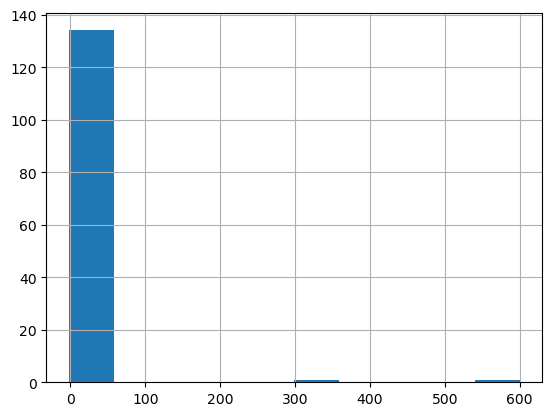

In [57]:
df.Staff.hist()

<Axes: >

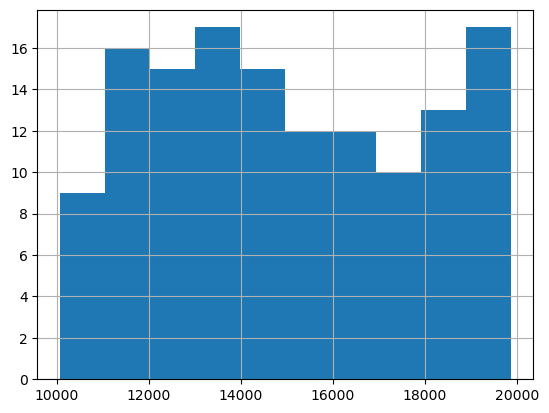

In [58]:
df['Floor Space'].hist()

<Axes: >

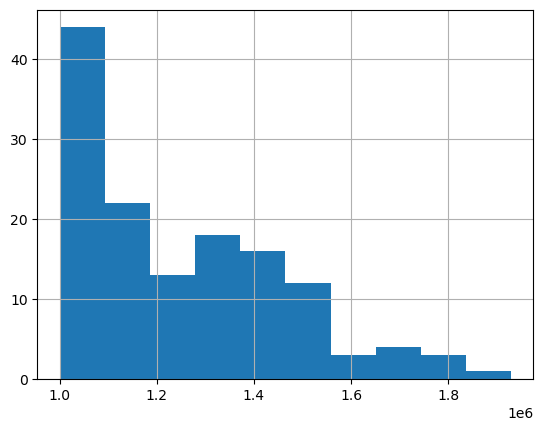

In [59]:
df['30 min population'].hist()

C:\Users\PAMELA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='30 min population', ylabel='Count'>

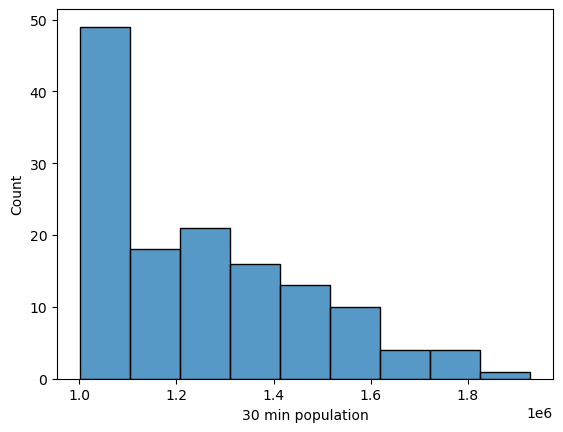

In [60]:
sns.histplot(df,x = '30 min population')

C:\Users\PAMELA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


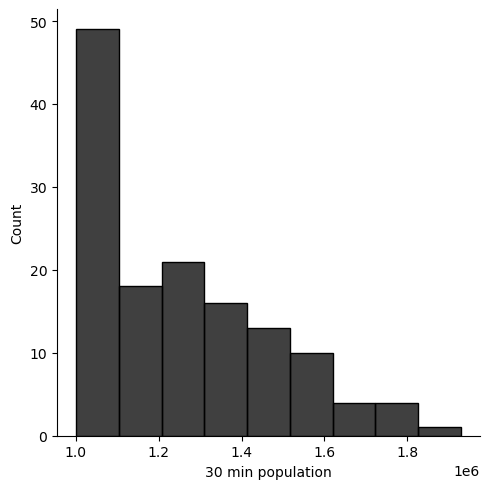

In [61]:
sns.displot(df['30 min population'],color = 'black')# skewed to the right

In [62]:
scaling =(x - x.min())/(x.max() - x.min())
standardization=(x - x.mean())/x.std()

In [63]:
df.sample(n = 5)

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance
26,Skelmersdale,UK,20971,Sof�a,7,13810,109,Yes,14,High Street,1392247,1077683,1068892,1045144,5,270,13,17,Good
32,Stretford,UK,24174,Francisca,6,18399,120,Yes,15,High Street,1101114,1087742,1063778,1018675,10,408,12,15,Bad
13,Stafford,UK,9171,Emily,8,13827,109,Yes,12,Retail Park,1132725,1102537,1058262,1012348,7,242,19,13,Good
58,Spalding,UK,47290,Taylor,6,11967,104,Yes,16,Shopping Centre,1678349,1113468,1027034,1018319,4,219,10,12,Bad
25,Sampford Courtenay,UK,20304,Nicol�s,5,12234,105,No,14,Retail Park,1765398,1555157,1053211,1015616,7,234,11,16,Bad


In [64]:
one_hot = pd.get_dummies(df['Car park'], dtype = int)
df = pd.concat([df,one_hot],axis =1)

In [65]:
df.drop('Car park',axis = 1,inplace =True)
df.head()

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance,No,Yes
0,Swinton (Greater Manchester),UK,1437,Roger,9,18526,121,10,Retail Park,1288374,1138224,1006986,1002340,3,238,16,16,Good,0,1
1,Stamford,UK,1544,Ella,8,18569,121,11,Shopping Centre,1086225,1015321,1012182,1008436,4,384,15,19,Good,0,1
2,Skipton,UK,2039,Valentina,-2,12288,105,12,Retail Park,1595638,1281661,1104490,1011395,11,219,13,18,Bad,1,0
3,Stratton,UK,2055,Antonia,7,17092,117,14,High Street,1179395,1022959,1009496,1002169,5,261,15,12,Bad,1,0
4,Shepperton,UK,2141,Gabriel,7,11307,103,18,Retail Park,1398558,1085170,1003137,1002513,7,200,19,13,Bad,1,0


In [66]:
df.Location.unique()

array(['Retail Park', 'Shopping Centre', 'High Street', 'Village'],
      dtype=object)

In [67]:
#lets check if we can rank the location by clearance space
df.groupby('Location')['Clearance space'].sum()

Location
High Street        10299
Retail Park        11189
Shopping Centre    13834
Village              368
Name: Clearance space, dtype: int64

<Axes: ylabel='Location'>

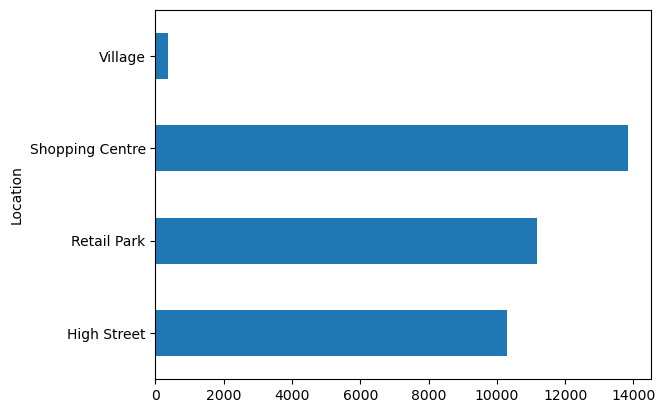

In [68]:
df.groupby('Location')['Clearance space'].sum().plot(kind = "barh")

In [69]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [70]:
 lb.fit_transform(df.Location)

array([1, 2, 1, 0, 1, 1, 0, 1, 2, 0, 1, 1, 2, 1, 0, 0, 0, 1, 2, 2, 2, 0,
       0, 2, 0, 1, 0, 2, 0, 0, 1, 2, 0, 0, 1, 3, 1, 1, 2, 0, 2, 0, 2, 1,
       1, 0, 0, 2, 2, 1, 1, 2, 1, 2, 2, 1, 0, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 2, 0, 0, 0, 2, 1,
       2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 0, 2,
       2, 0, 1, 0, 1, 1, 1, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 1, 1, 1,
       2, 2, 0, 0])

In [71]:
df.Location = lb.fit_transform(df.Location)
df.head(10)

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance,No,Yes
0,Swinton (Greater Manchester),UK,1437,Roger,9,18526,121,10,1,1288374,1138224,1006986,1002340,3,238,16,16,Good,0,1
1,Stamford,UK,1544,Ella,8,18569,121,11,2,1086225,1015321,1012182,1008436,4,384,15,19,Good,0,1
2,Skipton,UK,2039,Valentina,-2,12288,105,12,1,1595638,1281661,1104490,1011395,11,219,13,18,Bad,1,0
3,Stratton,UK,2055,Antonia,7,17092,117,14,0,1179395,1022959,1009496,1002169,5,261,15,12,Bad,1,0
4,Shepperton,UK,2141,Gabriel,7,11307,103,18,1,1398558,1085170,1003137,1002513,7,200,19,13,Bad,1,0
5,Southwell,UK,2309,Sarah,7,17888,119,19,1,1614716,1325848,1220059,1193318,2,394,17,11,Good,0,1
6,Swinton (South Yorkshire),UK,3800,James,8,13814,109,17,0,1323396,1047485,1000888,1000844,5,228,11,14,Bad,0,1
7,Sowerby Bridge,UK,4214,Ashley,9,15643,114,11,1,1052606,1025407,1004490,1000319,4,258,12,16,Good,0,1
8,Sheffield,UK,4857,Guilherme,9,13869,109,12,2,1537032,1301956,1220364,1057921,9,217,19,14,Good,0,1
9,Stanley,UK,4860,Grace,7,12071,105,19,0,1141000,1029186,1005096,1000687,6,222,16,18,Good,0,1


In [72]:
df.Country.unique()

array(['UK', 'France'], dtype=object)

In [73]:
o = pd.get_dummies(df.Country, dtype = int)

In [74]:
df = pd.concat([df, o],axis = 1)
df.head()

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Demographic score,Location,40min population,...,10 min population,Store age,Clearance space,Competition number,Competition score,Performance,No,Yes,France,UK
0,Swinton (Greater Manchester),UK,1437,Roger,9,18526,121,10,1,1288374,...,1002340,3,238,16,16,Good,0,1,0,1
1,Stamford,UK,1544,Ella,8,18569,121,11,2,1086225,...,1008436,4,384,15,19,Good,0,1,0,1
2,Skipton,UK,2039,Valentina,-2,12288,105,12,1,1595638,...,1011395,11,219,13,18,Bad,1,0,0,1
3,Stratton,UK,2055,Antonia,7,17092,117,14,0,1179395,...,1002169,5,261,15,12,Bad,1,0,0,1
4,Shepperton,UK,2141,Gabriel,7,11307,103,18,1,1398558,...,1002513,7,200,19,13,Bad,1,0,0,1


In [75]:
df.drop('Country', axis = 1, inplace= True)

In [76]:
df.head()

,Town,Store ID,Manager name,Staff,Floor Space,Window,Demographic score,Location,40min population,30 min population,...,10 min population,Store age,Clearance space,Competition number,Competition score,Performance,No,Yes,France,UK
0,Swinton (Greater Manchester),1437,Roger,9,18526,121,10,1,1288374,1138224,...,1002340,3,238,16,16,Good,0,1,0,1
1,Stamford,1544,Ella,8,18569,121,11,2,1086225,1015321,...,1008436,4,384,15,19,Good,0,1,0,1
2,Skipton,2039,Valentina,-2,12288,105,12,1,1595638,1281661,...,1011395,11,219,13,18,Bad,1,0,0,1
3,Stratton,2055,Antonia,7,17092,117,14,0,1179395,1022959,...,1002169,5,261,15,12,Bad,1,0,0,1
4,Shepperton,2141,Gabriel,7,11307,103,18,1,1398558,1085170,...,1002513,7,200,19,13,Bad,1,0,0,1


In [77]:
df.Town.nunique()

136

In [78]:
df.drop(['Town','Store ID','Manager name'], axis = 1,inplace = True)

In [79]:
df.sample(n = 5)

,Staff,Floor Space,Window,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance,No,Yes,France,UK
70,6,13899,109,19,0,1888945,1523248,1508361,1233530,2,227,10,15,Bad,0,1,0,1
2,-2,12288,105,12,1,1595638,1281661,1104490,1011395,11,219,13,18,Bad,1,0,0,1
25,5,12234,105,14,1,1765398,1555157,1053211,1015616,7,234,11,16,Bad,1,0,0,1
104,6,13009,107,11,0,1143772,1106672,1059392,1051305,6,206,19,16,Bad,0,1,0,1
65,8,15292,113,16,1,1099956,1008500,1003118,1000509,11,323,16,16,Good,0,1,0,1


In [80]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['Performance'] =lb.fit_transform(df.Performance)
#df.drop('Performance', axis = 1, inplace = True)
#df.head(10)

In [81]:
df.corr()['Performance'].abs()

Staff                 0.124331
Floor Space           0.267429
Window                0.274381
Demographic score     0.117908
Location              0.350950
40min population      0.099861
30 min population     0.072470
20 min population     0.005909
10 min population     0.001953
Store age             0.034238
Clearance space       0.257304
Competition number    0.209215
Competition score     0.345618
Performance           1.000000
No                    0.173044
Yes                   0.173044
France                0.123979
UK                    0.123979
Name: Performance, dtype: float64

In [82]:
threshold = 0.1
selected_data = df.corr()['Performance'].abs()[df.corr()['Performance'].abs() >= threshold]
selected_data
#columns_to_include = df.columns.difference(['Performance'])

# Calculate correlation matrix
#cor = df[columns_to_include].corr()

#print(cor)

Staff                 0.124331
Floor Space           0.267429
Window                0.274381
Demographic score     0.117908
Location              0.350950
Clearance space       0.257304
Competition number    0.209215
Competition score     0.345618
Performance           1.000000
No                    0.173044
Yes                   0.173044
France                0.123979
UK                    0.123979
Name: Performance, dtype: float64

In [83]:
threshold = 0.2
unselected_data = df.corr()['Performance'].abs()[df.corr()['Performance'].abs() <= threshold]
unselected_data

Staff                0.124331
Demographic score    0.117908
40min population     0.099861
30 min population    0.072470
20 min population    0.005909
10 min population    0.001953
Store age            0.034238
No                   0.173044
Yes                  0.173044
France               0.123979
UK                   0.123979
Name: Performance, dtype: float64

In [84]:
#using correlation to do feature selection
df.corr()

,Staff,Floor Space,Window,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance,No,Yes,France,UK
Staff,1.000000,0.076039,0.077630,-0.057831,0.126064,-0.098366,-0.024631,-0.056310,-0.006601,-0.172655,0.110591,0.034571,0.123579,0.124331,-0.071324,0.071324,-0.013765,0.013765
Floor Space,0.076039,1.000000,0.999208,0.038187,0.011581,0.051918,-0.032199,-0.046161,-0.096698,-0.049285,0.627324,0.073559,0.091447,0.267429,-0.100542,0.100542,-0.070044,0.070044
Window,0.077630,0.999208,1.000000,0.038633,0.012063,0.053228,-0.028688,-0.042441,-0.091651,-0.048992,0.628509,0.074034,0.104551,0.274381,-0.099573,0.099573,-0.072035,0.072035
Demographic score,-0.057831,0.038187,0.038633,1.000000,-0.136952,0.036694,-0.007616,0.053498,0.099587,-0.014967,0.041849,-0.100716,-0.072325,-0.117908,0.036597,-0.036597,0.044220,-0.044220
Location,0.126064,0.011581,0.012063,-0.136952,1.000000,0.127160,0.122606,0.056947,0.044362,-0.017015,0.102161,0.007687,0.073904,0.350950,-0.057223,0.057223,-0.088340,0.088340
40min population,-0.098366,0.051918,0.053228,0.036694,0.127160,1.000000,0.624732,0.516682,0.432857,-0.191329,-0.018234,-0.004326,0.040554,-0.099861,0.094837,-0.094837,0.032546,-0.032546
30 min population,-0.024631,-0.032199,-0.028688,-0.007616,0.122606,0.624732,1.000000,0.766158,0.667031,-0.098829,-0.093048,-0.054191,0.046811,-0.072470,0.122039,-0.122039,0.095203,-0.095203
20 min population,-0.056310,-0.046161,-0.042441,0.053498,0.056947,0.516682,0.766158,1.000000,0.807882,-0.046910,-0.085887,-0.081947,0.008492,-0.005909,0.016966,-0.016966,-0.027442,0.027442
10 min population,-0.006601,-0.096698,-0.091651,0.099587,0.044362,0.432857,0.667031,0.807882,1.000000,-0.103815,-0.053129,-0.039108,0.068781,0.001953,0.037949,-0.037949,-0.051530,0.051530
Store age,-0.172655,-0.049285,-0.048992,-0.014967,-0.017015,-0.191329,-0.098829,-0.046910,-0.103815,1.000000,-0.037935,-0.063024,-0.109725,-0.034238,0.104477,-0.104477,-0.044839,0.044839


<Axes: >

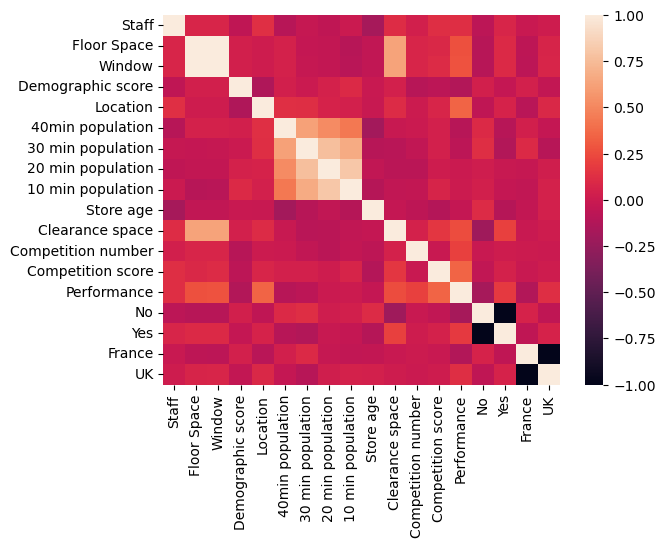

In [85]:
sns.heatmap(df.corr())

In [86]:
type(pd.DataFrame(selected_data))

pandas.core.frame.DataFrame

In [87]:
pd.DataFrame(selected_data).index

Index(['Staff', 'Floor Space', 'Window', 'Demographic score', 'Location',
       'Clearance space', 'Competition number', 'Competition score',
       'Performance', 'No', 'Yes', 'France', 'UK'],
      dtype='object')

In [88]:
selected = ['Staff', 'Floor Space', 'Window', 'Demographic score', 'Location',
       'Clearance space', 'Competition number', 'Competition score',
       'Performance', 'No', 'Yes', 'France', 'UK']

In [89]:
df1 = df[selected]
df1

,Staff,Floor Space,Window,Demographic score,Location,Clearance space,Competition number,Competition score,Performance,No,Yes,France,UK
0,9,18526,121,10,1,238,16,16,1,0,1,0,1
1,8,18569,121,11,2,384,15,19,1,0,1,0,1
2,-2,12288,105,12,1,219,13,18,0,1,0,0,1
3,7,17092,117,14,0,261,15,12,0,1,0,0,1
4,7,11307,103,18,1,200,19,13,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,7,14120,110,13,1,202,18,14,0,0,1,0,1
132,6,11205,103,15,2,203,13,18,0,1,0,0,1
133,7,16190,115,19,2,341,18,18,0,1,0,0,1
134,6,15516,113,17,0,261,14,10,0,1,0,0,1


In [90]:
x = df1.drop('Performance', axis = 1)
y = df1.Performance

In [91]:
x.head()

,Staff,Floor Space,Window,Demographic score,Location,Clearance space,Competition number,Competition score,No,Yes,France,UK
0,9,18526,121,10,1,238,16,16,0,1,0,1
1,8,18569,121,11,2,384,15,19,0,1,0,1
2,-2,12288,105,12,1,219,13,18,1,0,0,1
3,7,17092,117,14,0,261,15,12,1,0,0,1
4,7,11307,103,18,1,200,19,13,1,0,0,1


In [92]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: Performance, dtype: int32

In [93]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x, y, train_size = 0.7, shuffle = True, random_state =41)
print(f"The shape of x_train is :{x_train.shape}")
print(f"The shape of y_train is :{y_train.shape}")
print(f"The shape of x_test is :{x_test.shape}")
print(f"The shape of y_test is :{y_test.shape}")

The shape of x_train is :(95, 12)
The shape of y_train is :(95,)
The shape of x_test is :(41, 12)
The shape of y_test is :(41,)


In [94]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [95]:
nb = GaussianNB()
knn = KNeighborsClassifier()
scm = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [96]:
nb.fit(x_train, y_train)
round(nb.score(x_train, y_train),2)*100

71.0

In [97]:
knn.fit(x_train, y_train)
round(knn.score(x_train, y_train),2)*100

74.0

In [98]:
scm.fit(x_train, y_train)
round(scm.score(x_train, y_train),2)*100

65.0

In [99]:
dt.fit(x_train, y_train)
round(dt.score(x_train, y_train),2)*100

100.0

In [100]:
rf.fit(x_train, y_train)
round(rf.score(x_train, y_train),2)*100

100.0

 ## TESTING



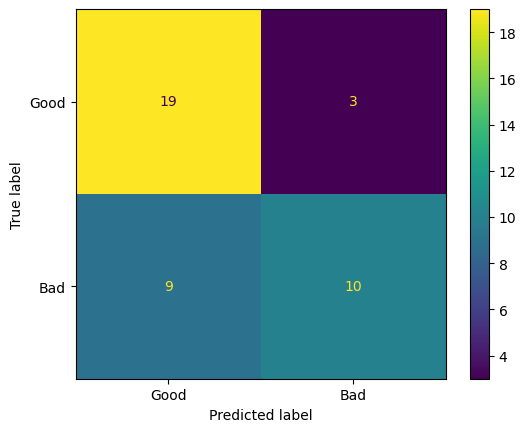

In [101]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
nb.predict(x_test)
round(accuracy_score(y_test, nb.predict(x_test)),2)*100
cm =confusion_matrix(y_test, nb.predict(x_test))
label = ['Good', 'Bad']
ConfusionMatrixDisplay(cm, display_labels = label).plot()

In [102]:
#accuracy score math
round(((19+10)/(19+3+9+10))*100,2)

70.73

[[ 9 13]
 [ 7 12]]


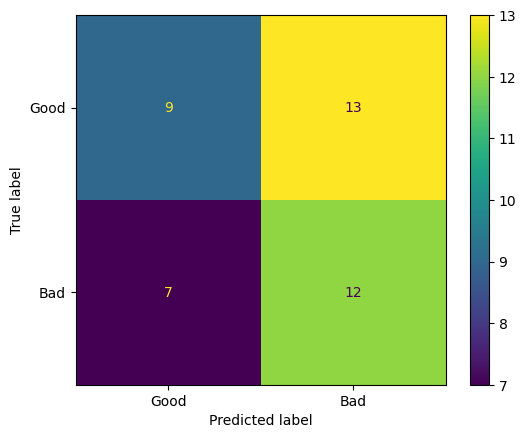

In [103]:
knn.predict(x_test)
round(accuracy_score(y_test, knn.predict(x_test)),2)*100
print(confusion_matrix(y_test, knn.predict(x_test)))
ConfusionMatrixDisplay(confusion_matrix(y_test, knn.predict(x_test)),display_labels = label).plot()

[[12 10]
 [ 5 14]]


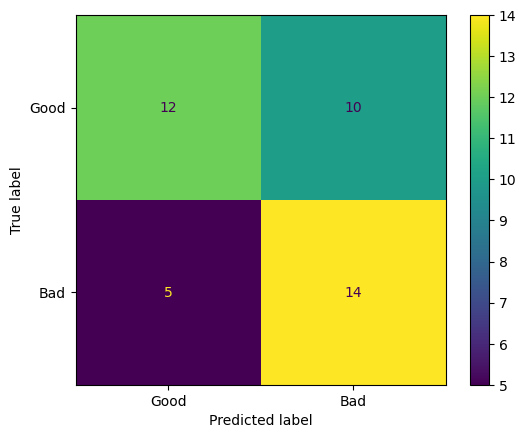

In [104]:
scm.predict(x_test)
round(accuracy_score(y_test, scm.predict(x_test)),2)*100
print(confusion_matrix(y_test, scm.predict(x_test)))
ConfusionMatrixDisplay(confusion_matrix(y_test, scm.predict(x_test)),display_labels = label).plot()

[[16  6]
 [12  7]]


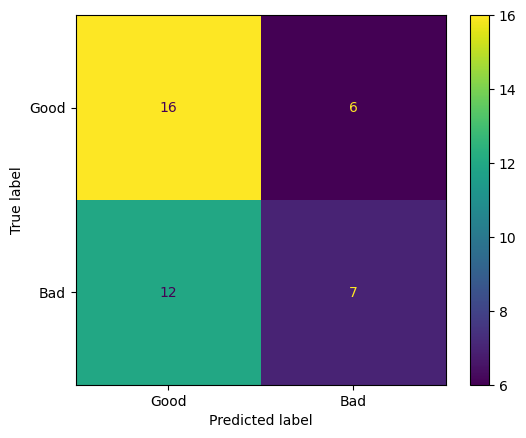

In [105]:
dt.predict(x_test)
round(accuracy_score(y_test, dt.predict(x_test)),2)*100
print(confusion_matrix(y_test, dt.predict(x_test)))
ConfusionMatrixDisplay(confusion_matrix(y_test, dt.predict(x_test)),display_labels = label).plot()

[[14  8]
 [ 5 14]]


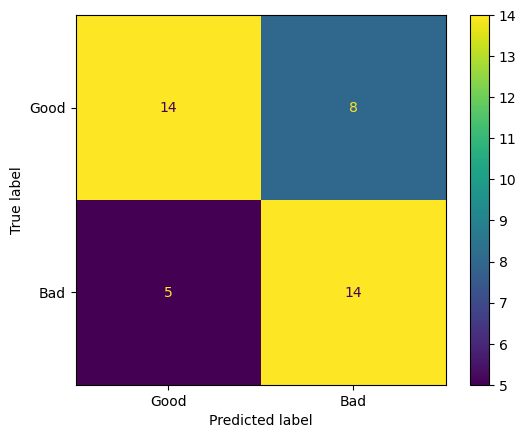

In [106]:
rf.predict(x_test)
round(accuracy_score(y_test, rf.predict(x_test)),2)*100
print(confusion_matrix(y_test, rf.predict(x_test)))
ConfusionMatrixDisplay(confusion_matrix(y_test, rf.predict(x_test)),display_labels = label).plot()

In [107]:
pip install pickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [108]:
import pickle as pk

In [109]:
filename = 'churn_model.pkl'
with open(filename, 'wb') as file:
        pk.dump(scm, file)

In [110]:
# Load the model from the pickle file
#with open('churn_model.pkl', 'rb') as file:
   # scm_model = pk.load(file)

In [111]:
scm_model =pk.load(open('churn_model.pkl','rb'))

In [112]:
scm_model

SVC()

In [113]:
x

,Staff,Floor Space,Window,Demographic score,Location,Clearance space,Competition number,Competition score,No,Yes,France,UK
0,9,18526,121,10,1,238,16,16,0,1,0,1
1,8,18569,121,11,2,384,15,19,0,1,0,1
2,-2,12288,105,12,1,219,13,18,1,0,0,1
3,7,17092,117,14,0,261,15,12,1,0,0,1
4,7,11307,103,18,1,200,19,13,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
131,7,14120,110,13,1,202,18,14,0,1,0,1
132,6,11205,103,15,2,203,13,18,1,0,0,1
133,7,16190,115,19,2,341,18,18,1,0,0,1
134,6,15516,113,17,0,261,14,10,1,0,0,1


In [114]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scale = sc.fit_transform(x)
x_scale

array([[-0.07720172,  1.27266567,  1.30576403, ...,  0.62269985,
        -0.12216944,  0.12216944],
       [-0.09493725,  1.28829278,  1.30576403, ...,  0.62269985,
        -0.12216944,  0.12216944],
       [-0.27229254, -0.99435465, -1.02702951, ..., -1.60591014,
        -0.12216944,  0.12216944],
       ...,
       [-0.11267278,  0.42371417,  0.43096645, ..., -1.60591014,
        -0.12216944,  0.12216944],
       [-0.13040831,  0.1787684 ,  0.13936726, ..., -1.60591014,
        -0.12216944,  0.12216944],
       [-0.07720172, -0.20209683, -0.15223193, ...,  0.62269985,
        -0.12216944,  0.12216944]])

In [115]:
type(x_scale)

numpy.ndarray

In [116]:
#convert to dataframe
x_scale =pd.DataFrame(x_scale,columns = [x.columns])
x_scale

,Staff,Floor Space,Window,Demographic score,Location,Clearance space,Competition number,Competition score,No,Yes,France,UK
0,-0.077202,1.272666,1.305764,-1.558199,-0.123455,-0.473990,0.532708,0.404560,-0.62270,0.62270,-0.122169,0.122169
1,-0.094937,1.288293,1.305764,-1.209080,1.075819,2.359104,0.186065,1.423453,-0.62270,0.62270,-0.122169,0.122169
2,-0.272293,-0.994355,-1.027030,-0.859962,-0.123455,-0.842680,-0.507219,1.083822,1.60591,-1.60591,-0.122169,0.122169
3,-0.112673,0.751520,0.722566,-0.161724,-1.322729,-0.027680,0.186065,-0.953963,1.60591,-1.60591,-0.122169,0.122169
4,-0.112673,-1.350871,-1.318629,1.234751,-0.123455,-1.211370,1.572634,-0.614332,1.60591,-1.60591,-0.122169,0.122169
...,...,...,...,...,...,...,...,...,...,...,...,...
131,-0.112673,-0.328567,-0.298032,-0.510843,-0.123455,-1.172561,1.225992,-0.274701,-0.62270,0.62270,-0.122169,0.122169
132,-0.130408,-1.387940,-1.318629,0.187395,1.075819,-1.153156,-0.507219,1.083822,1.60591,-1.60591,-0.122169,0.122169
133,-0.112673,0.423714,0.430966,1.583869,1.075819,1.524700,1.225992,1.083822,1.60591,-1.60591,-0.122169,0.122169
134,-0.130408,0.178768,0.139367,0.885632,-1.322729,-0.027680,-0.160577,-1.633225,1.60591,-1.60591,-0.122169,0.122169


In [117]:
from sklearn.model_selection import train_test_split
x_train_scale, x_test_scale, y_train_scale,y_test_scale = train_test_split(x_scale,y, train_size = 0.7, shuffle = True, random_state = 41)

In [118]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train_scale, y_train_scale)
round(knn.score(x_train_scale,y_train_scale)*100,2)

78.95

In [119]:
knn.predict(x_test_scale)

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [120]:
round(accuracy_score(y_test_scale,knn.predict(x_test_scale))*100,2)

68.29

In [121]:
confusion_matrix(y_test_scale,knn.predict(x_test_scale))

array([[17,  5],
       [ 8, 11]], dtype=int64)

In [122]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


nb = GaussianNB()
#scm = SVC(C=0.6)
#dt = DecisionTreeClassifier(min_samples_leaf=10)
rf = RandomForestClassifier()

In [123]:
#nb = GaussianNB(var_smoothing= 1e-09)
nb.fit(x_train_scale, y_train_scale)
round(nb.score(x_train_scale,y_train_scale)*100,2)

54.74

In [124]:
nb.predict(x_test_scale)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:

accuracy_score(y_test_scale,nb.predict(x_test_scale))

In [ ]:
confusion_matrix(y_test_scale,nb.predict(x_test_scale))

In [ ]:
scm = SVC()
scm.fit(x_train_scale, y_train_scale)
round(scm.score(x_train_scale,y_train_scale)*100,2)

In [ ]:
scm.predict(x_test_scale)

In [ ]:
accuracy_score(y_test_scale,scm.predict(x_test_scale))

In [ ]:
confusion_matrix(y_test_scale,scm.predict(x_test_scale))

In [ ]:
dt =DecisionTreeClassifier()
dt.fit(x_train_scale, y_train_scale)
round(dt.score(x_train_scale,y_train_scale)*100,2)

In [ ]:
dt.predict(x_test_scale)

In [ ]:
accuracy_score(y_test_scale,dt.predict(x_test_scale))

In [ ]:
confusion_matrix(y_test_scale,dt.predict(x_test_scale))

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train_scale, y_train_scale)
round(rf.score(x_train_scale,y_train_scale)*100,2)

In [ ]:
rf.predict(x_test_scale)

In [ ]:
accuracy_score(y_test_scale,rf.predict(x_test_scale))

In [ ]:
confusion_matrix(y_test_scale,rf.predict(x_test_scale))

In [ ]:
from sklearn.decomposition import PCA# shrink from 12 cols to 6 cols
pc = PCA(n_components = 6)
pc.fit_transform(x_scale)

In [ ]:
x_scale_pca =pd.DataFrame(pc.fit_transform(x_scale))
x_scale_pca

In [ ]:
from sklearn.model_selection import train_test_split
x_train_scale_pca, x_test_scale_pca, y_train_scale_pca,y_test_scale_pca = train_test_split(x_scale_pca,y, train_size = 0.7, shuffle = True, random_state = 41)

In [ ]:
#from sklearn.model_selection import train_test_split
#x_train_scal_pca,x_test_scale_pca,y_train_scale_pca,y_test_scale_pca = train_tet_split(x_scale_pca,y,train_size = 0.7,shuffle = True, random_state = 42))

In [ ]:
nb.fit(x_train_scale_pca,y_train_scale_pca)
nb.score(x_train_scale_pca,y_train_scale_pca)

In [ ]:
nb.predict(x_test_scale_pca)

In [ ]:
round(accuracy_score(y_test_scale_pca, nb.predict(x_test_scale_pca)),2)*100

In [ ]:
knn.fit(x_train_scale_pca, y_train_scale_pca)
knn.score(x_train_scale_pca, y_train_scale_pca)

In [ ]:
knn.predict(x_test_scale_pca)

In [ ]:
round(accuracy_score(y_test_scale_pca, knn.predict(x_test_scale_pca)),2)*100

In [ ]:
scm.fit(x_train_scale_pca, y_train_scale_pca)
scm.score(x_train_scale_pca, y_train_scale_pca)

In [ ]:
scm.predict(x_test_scale_pca)

In [ ]:
round(accuracy_score(y_test_scale_pca, scm.predict(x_test_scale_pca)),2)*100

In [ ]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler,scale

In [ ]:
data = pd.read_csv("train.csv")
data.head()

In [ ]:
data.sample(n=5)


In [ ]:
data.columns

In [ ]:
data.describe()

In [ ]:
data.isna().sum()

In [ ]:
data.isna().sum()[data.isna().sum()!= 0]

In [ ]:
data.isna().sum()!= 0

In [ ]:
data.Sex.value_counts()

In [ ]:
data.Embarked.value_counts()

In [ ]:
data.Survived.value_counts()

In [ ]:
data.Pclass.value_counts()

In [ ]:
male =data[data['Sex']== 'male']
male

In [ ]:
male.Sex.value_counts()

In [ ]:
female =data[data['Sex']== 'female']
female

In [ ]:
female.Sex.value_counts()

In [ ]:
female_class3 = data[(data['Sex']== 'female')&(data['Pclass'] == 3) & (data['Embarked'] == 'C')]
female_class3.head()

In [ ]:
#female_class3S = female[data['Pclass'] == 3] and data['Embarked'] == 'S']
#female_class3S
female_class3S = female[(female['Pclass'] == 3) & (female['Embarked'] == 'S')]
female_class3S

In [ ]:
male['Age'].mean()

In [ ]:
female['Age'].mean()

In [ ]:
data.Age.mean()

In [ ]:
#to ignore warnings
#import warnings
#warnings.filterwarnings('ignore')

In [ ]:
avg_sex_age = data.groupby('Sex')['Age'].mean()
avg_sex_age

In [ ]:
avg_sex_age.reset_index()

In [ ]:
avg_age_embarked = data.groupby(['Sex','Embarked'])['Age'].mean().round().reset_index()
avg_age_embarked

In [ ]:
avg_age_embarked = data.groupby(['Sex','Embarked'])['Age'].size().reset_index()
avg_age_embarked

In [ ]:
avg_age_embarked = data.groupby('Sex')['Age'].max().reset_index()
avg_age_embarked

In [ ]:
avg_age_embarked = data.groupby('Sex')['Age'].min().reset_index()
avg_age_embarked

In [ ]:
data[data.Age == data.Age.max()]

In [ ]:
data.Age.argmin()

In [ ]:
data.Name[803]

In [ ]:
data.Cabin.unique()

In [ ]:
data.Cabin.dtypes

In [ ]:
data['cabin'] = data['Cabin'].astype(str).str[0]
data.head()

In [ ]:
#data['Name'] = data.Name.str.extract(' ([A-Za-z]+\.)',expand = False)didnt remove the full stop
data['Name'] = data.Name.str.extract(' ([A-Za-z]+)\.',expand = False)
data.head()

In [ ]:
data.Name.value_counts()

In [ ]:
mapping = {
    'Mr' : 0,
    'Miss': 1,
    'Mrs': 2,
    'Master': 4,
    'Dr': 3,
    'Rev': 3,
    'Mlle' : 3,   
    'Major':3,       
    'Col': 3 ,          
    'Countess': 2,      
    'Capt': 3          
     'Ms' : 1           
     'Sir': 0           
    'Lady': 2          
    'Mme' : 3           
    'Don' : 3          
    'Jonkheer': 3      
}